In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anaemia-prediction-dataset/expanded_output.csv
/kaggle/input/anaemia-prediction-dataset/file_.csv
/kaggle/input/anaemia-prediction-dataset/d_output.csv


In [2]:
# importing libraries

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# load the dataset

df = pd.read_csv('/kaggle/input/anaemia-prediction-dataset/file_.csv')
df.head(5)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.97,28.36,26.41,5.15,Yes
1,2,F,44.01,29.22,27.33,7.97,Yes
2,3,F,47.77,27.73,24.61,9.14,Yes
3,4,F,45.96,30.69,25.19,4.00,Yes
4,5,M,46.91,31.26,22.21,9.90,Yes


In [4]:
df['Sex'].value_counts()

Sex
F     152
M     135
F     119
M      94
Name: count, dtype: int64

In [5]:
# checking null values sum

df.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [6]:
# checking duplicated values sum

df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        500 non-null    int64  
 1   Sex           500 non-null    object 
 2   %Red Pixel    500 non-null    float64
 3   %Green pixel  500 non-null    float64
 4   %Blue pixel   500 non-null    float64
 5   Hb            500 non-null    float64
 6   Anaemic       500 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 27.5+ KB


In [8]:
# check the value for 'Anaemic' and 'Sex'

print('Anaemic:', df.Anaemic.value_counts())
print('-'*50)
print('Sex:',df.Sex.value_counts())

Anaemic: Anaemic
Yes    250
No     250
Name: count, dtype: int64
--------------------------------------------------
Sex: Sex
F     152
M     135
F     119
M      94
Name: count, dtype: int64


In [9]:
# Directly using map for specified encoding
df['Sex'] = df['Sex'].map({'F': 0, 'F ': 0, 'M': 1, 'M ':1})
df['Anaemic'] = df['Anaemic'].map({'Yes': 1, 'No': 0})
# Check the result
print(df.head())

   Number  Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb  Anaemic
0       1    1       43.97         28.36        26.41  5.15        1
1       2    0       44.01         29.22        27.33  7.97        1
2       3    0       47.77         27.73        24.61  9.14        1
3       4    0       45.96         30.69        25.19  4.00        1
4       5    1       46.91         31.26        22.21  9.90        1


In [10]:
print(df['Sex'])
print(df['Anaemic'])

0      1
1      0
2      0
3      0
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Name: Sex, Length: 500, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Name: Anaemic, Length: 500, dtype: int64


In [11]:
# Check value count again 'Sex' & 'Anaemic'

print('Sex:', df.Sex.value_counts())
print('-'*50)
print('Anaemic:',df.Anaemic.value_counts())

Sex: Sex
0    271
1    229
Name: count, dtype: int64
--------------------------------------------------
Anaemic: Anaemic
1    250
0    250
Name: count, dtype: int64


In [12]:
# Checking Hb columns for useful information

print('Number of unique Hb in this dataset:', df['Hb'].nunique())
print('-'*50)
print('Minimum value of Hb in the dataset:', df['Hb'].min())
print('-'*50)
print('Maximum value of Hb in the dataset:', df['Hb'].max())

Number of unique Hb in this dataset: 345
--------------------------------------------------
Minimum value of Hb in the dataset: 4.0
--------------------------------------------------
Maximum value of Hb in the dataset: 18.55


In [13]:
# checking columns

df.columns

Index(['Number', 'Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic'],
      dtype='object')

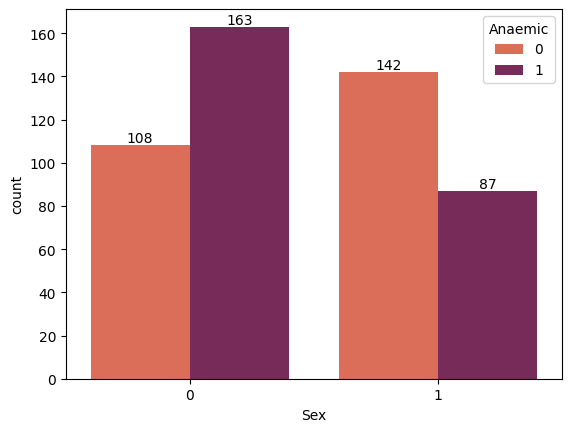

In [14]:
# Creating a count plot to visualize the distribution of the 'Sex' variable with respect to the 'Anaemic' variable
# Sex Female = 0, Male = 1

sex_Anaemic_plot = sns.countplot(data=df, x='Sex', hue='Anaemic', palette = 'rocket_r')
sex_Anaemic_plot.bar_label(sex_Anaemic_plot.containers[0]);
sex_Anaemic_plot.bar_label(sex_Anaemic_plot.containers[1]);

Adults:
    Men: 13.5 to 18.0 grams per deciliter (g/dL)
    Women (non-pregnant): 12.0 to 15.0 g/dL

In [15]:
def classify_hb(row):
    if row['Sex'] == 0:
        return 'Normal' if 12.1 <= row['Hb'] <= 15.1 else 'Abnormal'
    elif row['Sex'] == 1:
        return 'Normal' if 13.8 <= row['Hb'] <= 17.2 else 'Abnormal'
    else:
        return 'Unknown'
    
df['Hb_status'] = df.apply(classify_hb, axis=1)
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Hb_status
0,1,1,43.97,28.36,26.41,5.15,1,Abnormal
1,2,0,44.01,29.22,27.33,7.97,1,Abnormal
2,3,0,47.77,27.73,24.61,9.14,1,Abnormal
3,4,0,45.96,30.69,25.19,4.00,1,Abnormal
4,5,1,46.91,31.26,22.21,9.90,1,Abnormal


[Text(0, 0, '61'), Text(0, 0, '68')]

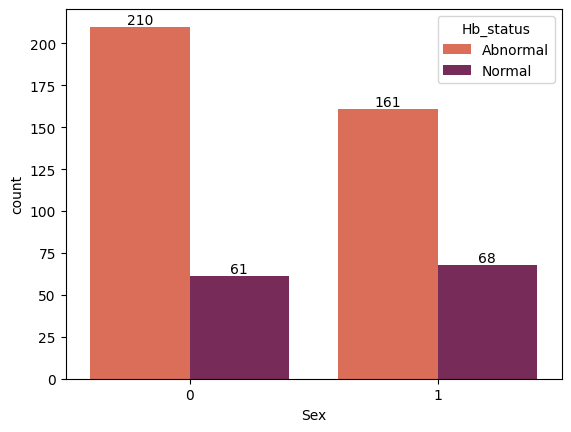

In [16]:
sex_hb_plot = sns.countplot(data=df,x='Sex',hue='Hb_status',palette='rocket_r')
sex_hb_plot.bar_label(sex_hb_plot.containers[0])
sex_hb_plot.bar_label(sex_hb_plot.containers[1])

In [17]:
df = df.drop(columns = ['Hb_status','Number'])
df.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,43.97,28.36,26.41,5.15,1
1,0,44.01,29.22,27.33,7.97,1
2,0,47.77,27.73,24.61,9.14,1
3,0,45.96,30.69,25.19,4.00,1
4,1,46.91,31.26,22.21,9.90,1


In [18]:
# Statistic information

df.describe()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.458000,44.913580,29.349720,25.570440,10.893100,0.500000
std,0.498732,2.950017,1.844623,2.215913,3.040943,0.500501
min,0.000000,36.800000,24.150000,17.950000,4.000000,0.000000
25%,0.000000,43.000000,28.130000,24.550000,8.920000,0.000000
50%,0.000000,44.555000,29.480000,25.935000,9.950000,0.500000
75%,1.000000,46.465000,30.692500,27.002500,13.330000,1.000000
max,1.000000,56.850000,33.600000,31.300000,18.550000,1.000000


In [19]:
# Scaling

df['%Red Pixel'] = StandardScaler().fit_transform(df[['%Red Pixel']])
df['%Green pixel'] = StandardScaler().fit_transform(df[['%Green pixel']])
df['%Blue pixel'] = StandardScaler().fit_transform(df[['%Blue pixel']])
df['Anaemic'] = StandardScaler().fit_transform(df[['Anaemic']])


df.describe()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
count,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,500.000000
mean,0.458000,-1.037392e-15,-7.815970e-16,-6.386003e-16,10.893100,0.000000
std,0.498732,1.001002e+00,1.001002e+00,1.001002e+00,3.040943,1.001002
min,0.000000,-2.753105e+00,-2.821675e+00,-3.442406e+00,4.000000,-1.000000
25%,0.000000,-6.493171e-01,-6.618920e-01,-4.609666e-01,8.920000,-1.000000
50%,0.000000,-1.216736e-01,7.069761e-02,1.646839e-01,9.950000,0.000000
75%,1.000000,5.264288e-01,7.286717e-01,6.469090e-01,13.330000,1.000000
max,1.000000,4.050273e+00,2.306453e+00,2.588232e+00,18.550000,1.000000


In [20]:
# Split the dataset

X = df.drop(columns = ['Anaemic'])
y = df['Anaemic']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

print('X_train and y_train shape:', X_train.shape, y_train.shape)
print('-'*45)
print('X_test, y_test shape:', X_test.shape, y_test.shape)

X_train and y_train shape: (375, 5) (375,)
---------------------------------------------
X_test, y_test shape: (125, 5) (125,)


In [21]:
# KNeighbors Classifier

clf_knn = KNN(n_neighbors=3)
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_pred_knn = clf_knn.predict(X_test)
print('KNN Accuracy with:', accuracy_score(y_true=y_test, y_pred=y_pred_knn)*100)
print('-'*40)
print('KNN precision_score:', precision_score(y_true=y_test, y_pred=y_pred_knn)*100)
print('-'*40)
print('KNN recall_score:', recall_score(y_true=y_test, y_pred=y_pred_knn)*100)
print('-'*40)
print('KNN f1_score:', f1_score(y_true=y_test, y_pred=y_pred_knn)*100)

KNN Accuracy with: 98.4
----------------------------------------
KNN precision_score: 98.4375
----------------------------------------
KNN recall_score: 98.4375
----------------------------------------
KNN f1_score: 98.4375


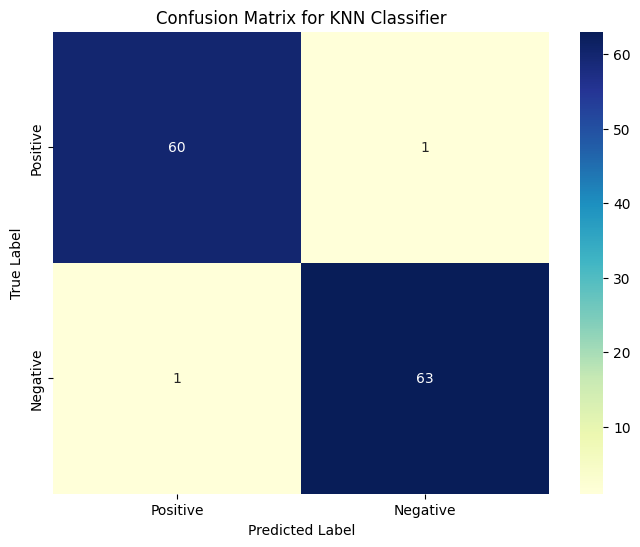

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['Positive', 'Negative'],yticklabels=['Positive', 'Negative'], cmap="YlGnBu")
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()